In [1]:
# Pradėta 2024-11-21_ObjectProperties.ipynb

import pandas as pd
import time
import sqlite3
import random
import sys
import os

from bs4 import BeautifulSoup

# Selenium
import selenium
from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.firefox.options import Options as FirefoxOptions
from selenium import webdriver

sys.path.append(os.path.abspath(".."))
from my_lib.properties_of_17 import properties_of
# from my_lib.my_db_functions import df_to_sqlite

In [ ]:
# Nustatymai, parametrai:

item_type = 'skalbimo-masinos'
item_title = 'Skalbimo mašinos'
# 'dronai', 'televizoriai', 'saldytuvai', 'televizoriai', 'mobilieji-telefonai'

item_params = 'f.s-gamintojas=LG&'
item_producer = 'LG'

url = f'https://www.varle.lt/{item_type}/?{item_params}'
print(url)

# https://www.varle.lt/skalbimo-masinos/?f.s-gamintojas=LG

https://www.varle.lt/skalbimo-masinos/?f.s-gamintojas=LG&


In [3]:
varlė_skalb=properties_of('varlė_skalb',engine='pandas')

In [4]:
# SCRAP

# Atidaro Chrome naršyklę,
# reikia patvirtinti "Leisti visus slapukus"!
# Šis fragmentas automatiškai panaikina „draiver“.

opcijos = Options()
opcijos.add_argument('--incognito')
opcijos.add_argument('--ignore-certificate-errors')
opcijos.add_argument('--ignore-ssl-errors')
driver = webdriver.Chrome(options=opcijos)

driver.get(url)
# time.sleep(3)
source = driver.page_source
print(f'First page: {url}')

bs = BeautifulSoup(source,'html.parser')
pages_numbers = bs.find('div',{'class':'PAGINATION'}).find_all('li',{'class':'number'})
total_pages = int(pages_numbers[-1].text.strip())
print(f'Total pages: {total_pages}')

First page: https://www.varle.lt/skalbimo-masinos/?f.s-gamintojas=LG&
Total pages: 2


In [7]:
# SCRAP

# Toliau analizuojamas prekių sąrašo html iš bs=BeautifulSoup().

grid_items = bs.find_all('div',{'class':'GRID_ITEM'})
for grid_item in grid_items:

    item_href = grid_item.find('div',{'class':'product-title'}).find('a')['href']
    item_url = 'https://www.varle.lt'+ item_href
    item_id = item_href.split('-')[-1].split('.')[0]
    id = int(item_id)

    price_container = grid_item.find('div',{'class':'price-container'})
    product_info = grid_item.find('div',{'class':'product-info'})

    price_value = price_container.find('span',{'class':'price-value'}).getText()
    item_price = ''.join(price_value.split())

    # Find all <li> elements
    all_li = grid_item.find_all('li')

    # Initialize variables for results
    gylis = None
    resolution = None

    # Iterate through <li> elements and check their text content
    for li in all_li:
        if "Gylis (cm)" in li.text:
            gylis = li.find('span').text
        elif "Skalbinių talpa (kg)" in li.text:
            talpa = li.find('span').text

    print(f"gylis: {gylis}, talpa: {talpa}.")

    varlė_skalb.add_property( id, 'url', item_url )
    varlė_skalb.add_property( id, 'price', item_price )
    varlė_skalb.add_property( id, 'gylis', gylis )
    varlė_skalb.add_property( id, 'talpa', talpa )


# print(f'DF items: {len(items_df)}.')

gylis: 48, talpa: 8.
gylis: 48, talpa: 7.
gylis: 48, talpa: 8.
gylis: 48, talpa: 8.
gylis: 47, talpa: 9.
gylis: 55, talpa: 10.
gylis: 66, talpa: 10.
gylis: 47, talpa: 8.
gylis: 56, talpa: 9.
gylis: 44, talpa: 6.
gylis: 55, talpa: 11.
gylis: 56, talpa: 10.
gylis: 48, talpa: 9.
gylis: 48, talpa: 9.
gylis: 62, talpa: 13.
gylis: 56, talpa: 11.
gylis: 48, talpa: 9.
gylis: 64, talpa: 7.
gylis: 48, talpa: 9.
gylis: 56, talpa: 11.
gylis: 56, talpa: 11.
gylis: 62, talpa: 10.
gylis: 56, talpa: 9.
gylis: 56, talpa: 11.
gylis: 48, talpa: 7.
gylis: 54, talpa: 8.
gylis: 62, talpa: 13.
gylis: 56, talpa: 9.
gylis: 54, talpa: 9.
gylis: 56, talpa: 9.
gylis: 50, talpa: 8,5.
gylis: 48, talpa: 9.
gylis: 56, talpa: 9.
gylis: 56, talpa: 8.
gylis: 48, talpa: 9.
gylis: 62, talpa: 10.
gylis: 62, talpa: 11.
gylis: 62, talpa: 9.


In [9]:
# item_block
# price_container
# product_info

df_df_=varlė_skalb.get_wide_df()
print(df_df_.head(3))
print(len(df_df_))

property_id        id gylis    price talpa  \
0            13656834    64     549€     7   
1            16325482    48  429.99€     7   
2            17468365    48  659.99€     7   

property_id                                                url  
0            https://www.varle.lt/skalbimo-masinos/skalbimo...  
1            https://www.varle.lt/skalbimo-masinos/lg-skalb...  
2            https://www.varle.lt/skalbimo-masinos/skalbimo...  
38


In [10]:
# SCRAP

# Perskaitomi kiti prekių sąrašo puslapiai,
# po to įrašoma į db

import random

# for page_number in range(2,total_pages+1):
for page_number in range(2,total_pages+1):

    url = f'https://www.varle.lt/{item_type}/?{item_params}p={page_number}'
    driver.get(url)
    time.sleep(random.randint(25,35))
    source = driver.page_source
    print(f'Prskaityta {url}')

    bs = BeautifulSoup(source,'html.parser')

    grid_items = bs.find_all('div',{'class':'GRID_ITEM'})
    for grid_item in grid_items:

        item_href = grid_item.find('div',{'class':'product-title'}).find('a')['href']
        item_url = 'https://www.varle.lt'+ item_href
        item_id = item_href.split('-')[-1].split('.')[0]
        id = int(item_id)

        price_container = grid_item.find('div',{'class':'price-container'})
        product_info = grid_item.find('div',{'class':'product-info'})

        price_value = price_container.find('span',{'class':'price-value'}).getText()
        item_price = ''.join(price_value.split())

        # Find all <li> elements
        all_li = grid_item.find_all('li')

        # Initialize variables for results
        gylis = None
        resolution = None

        # Iterate through <li> elements and check their text content
        for li in all_li:
            if "Gylis (cm)" in li.text:
                gylis = li.find('span').text
            elif "Skalbinių talpa (kg)" in li.text:
                talpa = li.find('span').text

        print(f"gylis: {gylis}, talpa: {talpa}.")

        varlė_skalb.add_property( id, 'url', item_url )
        varlė_skalb.add_property( id, 'price', item_price )
        varlė_skalb.add_property( id, 'gylis', gylis )
        varlė_skalb.add_property( id, 'talpa', talpa )

    # items_df.drop_duplicates(subset='id',keep='last',inplace=True)
    # print(f'Get {items_total} items. Unique {len(items_df)} items.')

# driver.close() # Uždaro Chrome puslapį.

Prskaityta https://www.varle.lt/skalbimo-masinos/?f.s-gamintojas=LG&p=2
gylis: 60, talpa: 9.
gylis: 63, talpa: 9.
gylis: 62, talpa: 9.
gylis: 60, talpa: 10.
gylis: None, talpa: 10.
gylis: 48, talpa: 8.
gylis: 56, talpa: 9.
gylis: 48, talpa: 8.
gylis: 56, talpa: 11.
gylis: 55, talpa: 11.
gylis: 56, talpa: 11.
gylis: 66, talpa: 13.
gylis: 54, talpa: 8.
gylis: 48, talpa: 9.
gylis: 44, talpa: 6,5.
gylis: 48, talpa: 8.
gylis: 62, talpa: 10.
gylis: 48, talpa: 8,5.
gylis: 49, talpa: 8,5.
gylis: 56, talpa: 10.
gylis: 63, talpa: 11.
gylis: 62, talpa: 7.
gylis: 56, talpa: 10.


In [14]:
# Pridedami stulpeliai kaina centais (int) ir gamintojas

import re

def price_in_cents(price:str) -> int:
    # Pašalina visus simbolius, išskyrus skaičius, kablelį ir tašką:
    cleaned = re.sub(r'[^\d.,]', '', price).replace(',', '.').replace(' ', '')
    return int(float(cleaned)*100)

for x in varlė_skalb.get_wide_df(['price']).values: # 'price','price_in_cents','producer'
    print(x[0],x[1])
    varlė_skalb.add_property( x[0], 'price_in_cents', price_in_cents(x[1]) )
    varlė_skalb.add_property( x[0], 'producer', item_producer )

#     varlė_tv.add_property( id, 'resolution', resolution )
#     varlė_tv.add_property( id, 'resolution', resolution )

# varlė_tv.property['price_in_cents'] = varlė_tv.property['price'].apply(price_in_cents)
# varlė_tv.property['producer'] = 'samsung'

13656834 549€
16325482 429.99€
17468365 659.99€
25448488 1225.99€
25472970 435.99€
26563855 685.99€
29158966 519.99€
29186503 925.99€
29429233 569€
29577520 487.80€
29828390 419.99€
30115453 549.99€
30115459 515.99€
30115464 647.90€
30115470 519.99€
30115476 475.99€
30351209 515.90€
30658623 410€
30770402 382.99€
30927888 619.99€
30939798 665.99€
30942061 982.90€
31008059 830.90€
31008060 599.99€
31085059 569.99€
31314829 465.29€
31328054 554.45€
31352257 679.99€
31352956 568.67€
31400471 362.67€
31438373 367.79€
31562640 459.99€
31563945 411.99€
31954458 659.99€
31954891 405.99€
32082188 351.90€
32083627 865.99€
32145285 426.95€
32154608 579.43€
32610849 789.03€
32745759 779.99€
32763666 879.99€
32763711 749.99€
33292221 409.29€
33794294 440.71€
34294535 579.99€
34816553 339.99€
34902938 313.49€
34921531 435.99€
34996968 495.99€
35314522 549.99€
36070105 504.79€
36699485 469.99€
36912985 645.99€
37208393 695.99€
37235141 555.99€
37235142 829.99€
39507412 507.99€
40742021 579.99€
41160

In [15]:
df_df_=varlė_skalb.get_wide_df()
print(df_df_.head(3))
print(len(df_df_))

property_id        id gylis    price price_in_cents producer talpa  \
0            13656834    64     549€          54900       LG     7   
1            16325482    48  429.99€          42999       LG     7   
2            17468365    48  659.99€          65999       LG     7   

property_id                                                url  
0            https://www.varle.lt/skalbimo-masinos/skalbimo...  
1            https://www.varle.lt/skalbimo-masinos/lg-skalb...  
2            https://www.varle.lt/skalbimo-masinos/skalbimo...  
61


In [ ]:
varlė_skalb.write_wide('varlė_skalb','csv')
varlė_skalb.write_narrow('varlė_skalb','csv')
varlė_skalb.write_wide('varlė_skalb','parquet')
# varlė_skalb.write_narrow('varlė_skalb','parquet') # neveikia?
varlė_skalb.write_wide('varlė_skalb','feather')
# varlė_skalb.write_narrow('varlė_skalb','feather') # neveikia?

Plačios lentelės duomenys išsaugoti į varlė_skalb per 0.01s.
Siauros lentelės duomenys išsaugoti į varlė_skalb per 0.00s.
Plačios lentelės duomenys išsaugoti į varlė_skalb per 0.01s.
Plačios lentelės duomenys išsaugoti į varlė_skalb per 0.02s.


In [28]:
print(len(varlė_skalb.property))
print(varlė_skalb.property.head(10))

366
         id property_id                                              value
0  31563945         url  https://www.varle.lt/skalbimo-masinos/skalbimo...
1  31563945       price                                            411.99€
2  31563945       gylis                                                 48
3  31563945       talpa                                                  8
4  16325482         url  https://www.varle.lt/skalbimo-masinos/lg-skalb...
5  16325482       price                                            429.99€
6  16325482       gylis                                                 48
7  16325482       talpa                                                  7
8  30770402         url  https://www.varle.lt/skalbimo-masinos/lg-f2wr5...
9  30770402       price                                            382.99€


In [30]:
wide_df=varlė_skalb.get_wide_df() # 'price','price_in_cents','producer'
print(wide_df.head(3))
print(len(wide_df))
print(wide_df.columns)

property_id        id gylis    price price_in_cents producer talpa  \
0            13656834    64     549€          54900       LG     7   
1            16325482    48  429.99€          42999       LG     7   
2            17468365    48  659.99€          65999       LG     7   

property_id                                                url  
0            https://www.varle.lt/skalbimo-masinos/skalbimo...  
1            https://www.varle.lt/skalbimo-masinos/lg-skalb...  
2            https://www.varle.lt/skalbimo-masinos/skalbimo...  
61
Index(['id', 'gylis', 'price', 'price_in_cents', 'producer', 'talpa', 'url'], dtype='object', name='property_id')


In [31]:
from my_lib.my_db_functions import df_to_sqlite

print('Save DF to SQLite3. Plati lentelė.')
df_to_sqlite(wide_df,"./my_scrap_working_data.db",table_name='varlė_tv')

print('Save DF to SQLite3. Siaura lentelė: varlė_skalb.property')
df_to_sqlite(varlė_skalb.property,"./my_scrap_working_data.db",table_name='properties_of_varlė_tv')

Save DF to SQLite3. Plati lentelė.
Lentelė 'varlė_tv' sėkmingai įrašyta į DB.
Save DF to SQLite3. Siaura lentelė: varlė_skalb.property
Lentelė 'properties_of_varlė_tv' sėkmingai įrašyta į DB.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sukuriame pavyzdinį DataFrame su skalb. m. duomenimis
dataframe = wide_df

def to_int(value):
    if isinstance(value, str):
        # Pakeičiame kablelį į tašką
        value = value.replace(',', '.')
        # Patikriname, ar tai skaičius su dešimtainiu tašku
        if '.' in value:
            return int(float(value))  # Pirmiausia konvertuojame į float, tada į int
        return int(value)
    return value

dataframe['gylis'] = dataframe['gylis'].apply(to_int)
dataframe['talpa'] = dataframe['talpa'].apply(to_int)
dataframe['price_in_cents'] = dataframe['price_in_cents'].apply(to_int)

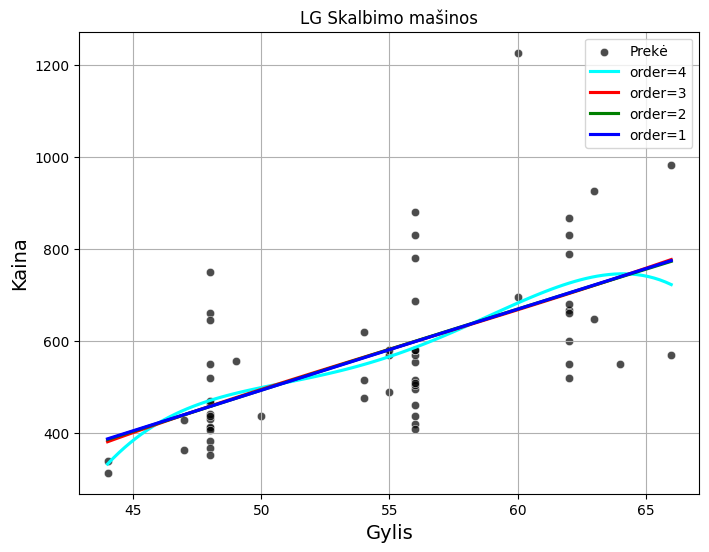

In [60]:
# 1. Vienas grafikas: gylis (x) vs kaina (y, eurais) su interpoliacija

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataframe['gylis'], y=dataframe['price_in_cents']/100, color='black', alpha=0.7, label='Prekė')
sns.regplot(x=dataframe['gylis'], y=dataframe['price_in_cents']/100, order=4, scatter=False, color='cyan', ci=None, label='order=4')
sns.regplot(x=dataframe['gylis'], y=dataframe['price_in_cents']/100, order=3, scatter=False, color='red', ci=None, label='order=3')
sns.regplot(x=dataframe['gylis'], y=dataframe['price_in_cents']/100, order=2, scatter=False, color='green', ci=None, label='order=2')
sns.regplot(x=dataframe['gylis'], y=dataframe['price_in_cents']/100, order=1, scatter=False, color='blue', ci=None, label='order=1')
plt.title(f"{item_producer} {item_title}")
plt.xlabel('Gylis',fontsize=14)
plt.ylabel('Kaina',fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

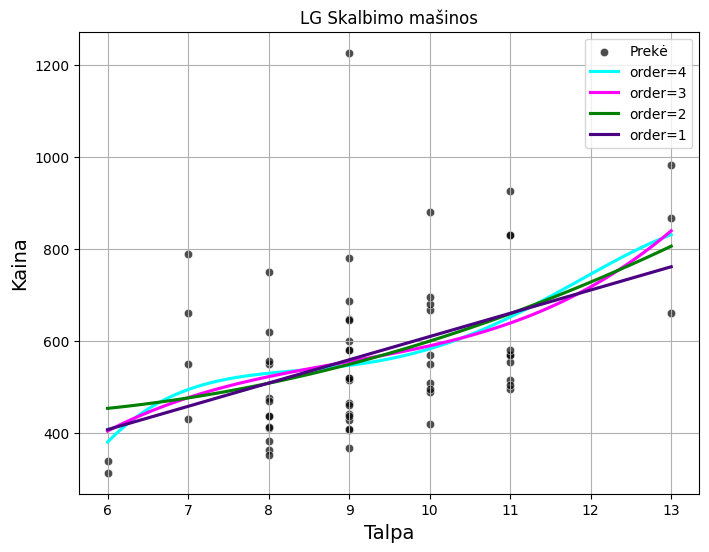

In [58]:
# 1. Vienas grafikas: talpa (x) vs kaina (y, eurais) su interpoliacija

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataframe['talpa'], y=dataframe['price_in_cents']/100, color='black', alpha=0.7, label='Prekė')
sns.regplot(x=dataframe['talpa'], y=dataframe['price_in_cents']/100, order=4, scatter=False, color='cyan', ci=None, label='order=4')
sns.regplot(x=dataframe['talpa'], y=dataframe['price_in_cents']/100, order=3, scatter=False, color='magenta', ci=None, label='order=3')
sns.regplot(x=dataframe['talpa'], y=dataframe['price_in_cents']/100, order=2, scatter=False, color='green', ci=None, label='order=2')
sns.regplot(x=dataframe['talpa'], y=dataframe['price_in_cents']/100, order=1, scatter=False, color='indigo', ci=None, label='order=1')
plt.title(f"{item_producer} {item_title}")
plt.xlabel('Talpa',fontsize=14)
plt.ylabel('Kaina',fontsize=14)
plt.legend()
plt.grid(True)
plt.show()